 # Mnist 손글씨분류

Import packages

In [16]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
import input_data
import mnist
from dataset.mnist import load_mnist
import matplotlib.pylab as plt

Checking data

Extracting ./mnist_data\train-images-idx3-ubyte.gz
Extracting ./mnist_data\train-labels-idx1-ubyte.gz
Extracting ./mnist_data\t10k-images-idx3-ubyte.gz
Extracting ./mnist_data\t10k-labels-idx1-ubyte.gz


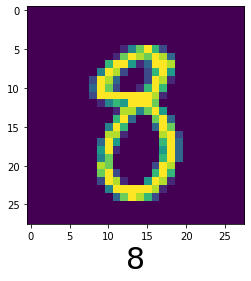

In [17]:
mnist_images = input_data.read_data_sets("./mnist_data", one_hot=False)
pic,real_values = mnist_images.train.next_batch(25)   
index =10 # 0~24 정수 입력해보기
image = pic[index,:]
image = np.reshape(image,[28,28])
plt.imshow(image)
plt.xlabel(real_values[index], fontsize=30)
plt.show()

Load the dataset & Shape of data

In [18]:
(x_train, y_train), (x_test, y_test)=load_mnist(flatten = True, normalize = True)

In [19]:
y_train=pd.get_dummies(y_train) 
y_test=pd.get_dummies(y_test) 

In [20]:
print('x_train shape : ',x_train.shape)
print('y_train shape : ',y_train.shape) 
print('x_test shape : ',x_test.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (60000, 784)
y_train shape :  (60000, 10)
x_test shape :  (10000, 784)
y_test shape :  (10000, 10)


#사이킷런 패키지 이용

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

prediction = clf.predict(x_test)
print('shape of prediction:' ,prediction.shape)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


shape of prediction: (10000, 10)


In [22]:
#모델평가점수
result = (prediction == y_test).mean()
print(result)

0    0.9946
1    0.9971
2    0.9843
3    0.9813
4    0.9849
5    0.9804
6    0.9885
7    0.9865
8    0.9780
9    0.9824
dtype: float64
